In [63]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
import os
from src import config

In [64]:
features_df = pd.read_pickle(os.path.join(config.classification_resource_dir, "norm_young_pop_features_df.pkl"))
labels_df = pd.read_pickle(os.path.join(config.classification_resource_dir, "norm_young_pop_labels_df.pkl"))

In [65]:
# Remove all the features that are not contains 'Pre' in their name
features_df = features_df.loc[:, ~features_df.columns.str.contains('Post')]

# Remove all the features that are contains 'Saccades' in their name
# features_df = features_df.loc[:, features_df.columns.str.contains('Saccades') | features_df.columns.str.contains(config.MOVIE)]

# Remove all the features that are not contains 'DVA' in their name
# features_df = features_df.loc[:, features_df.columns.str.contains('DVA') | features_df.columns.str.contains(config.MOVIE)]

features_df.head()

,Movie,Blinks_Per_Minute,Blinks_Duration_Mean,Blinks_Duration_Median,Blink_Variability,Blinks_Duration_Min,Blinks_Duration_Max,Fixations_Count,Fixations_Rate,Fixations_Duration_Mean,...,DVA_Min_Gaze_Pre,DVA_Sem_Gaze_Pre,DVA_AUC_Gaze_Pre,DVA_Mean_Fixations_Pre,DVA_Median_Fixations_Pre,DVA_Std_Fixations_Pre,DVA_Max_Fixations_Pre,DVA_Min_Fixations_Pre,DVA_Sem_Fixations_Pre,DVA_AUC_Fixations_Pre
0,33,14.285714,-43.483557,-1.063830,-92.302235,-7.500000,-76.391982,13.043478,13.043478,32.755068,...,50.823869,28.265238,-6.156505,-10.261137,6.798997,28.381958,18.072065,-38.798262,23.437093,2.494864
1,16,0.000000,NaN,NaN,NaN,NaN,NaN,-10.344828,-10.344828,18.483816,...,-11.876886,40.960999,-9.092459,-2.079497,0.810400,46.448931,16.927808,-14.518259,49.403481,-20.123525
2,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,26,67.008798,-93.215031,-93.215031,-96.456693,-80.612245,-94.651163,45.454545,47.863427,-33.968686,...,-99.452391,-5.450275,-32.213414,-20.317268,-23.471706,39.375618,3.777702,-97.715073,-13.562911,37.409513
4,27,0.000000,NaN,NaN,NaN,NaN,NaN,-2.325581,-3.225806,-6.944390,...,-95.707373,38.529404,3.852616,2.947095,-3.834494,20.206655,24.714188,-92.718511,21.508024,5.673336


EDA

In [66]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3024 entries, 0 to 3023
Columns: 135 entries, Movie to DVA_AUC_Fixations_Pre
dtypes: float64(134), int8(1)
memory usage: 3.1 MB


In [67]:
labels_df.head()

,pop
series_id,
0,1.0
1,1.0
2,0.0
3,1.0
4,0.0


In [68]:
labels_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3024 entries, 0 to 3023
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pop     3024 non-null   float64
dtypes: float64(1)
memory usage: 47.2 KB


<AxesSubplot:>

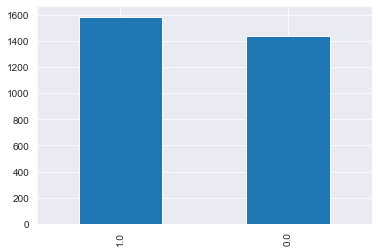

In [69]:
labels_df['pop'].value_counts().plot(kind='bar')

Data Cleaning

how many missing values / inf values are there in each column? show the top 10

In [70]:
features_df.isin([np.nan, np.inf, -np.inf]).mean(axis=0).sort_values(ascending=False).head(10)

Blink_Variability                               0.935847
Blinks_Duration_Mean                            0.758929
Blinks_Duration_Median                          0.758929
Blinks_Duration_Min                             0.758929
Blinks_Duration_Max                             0.758929
Blinks_Per_Minute                               0.617725
Pupil radius_Fixations_First_Diff_Pre           0.379630
Pupil radius_Fixations_ReEntry_Mean_Diff_Pre    0.375992
Duration_Std_Saccades_Start_In_RoI_Pre          0.317791
Duration_Sem_Saccades_Start_In_RoI_Pre          0.317791
dtype: float64

Remove columns with more than 30% missing values or inf values

In [71]:
features_df = features_df.loc[:, features_df.isin([np.nan, np.inf, -np.inf]).mean(axis=0) < 0.3]

In [72]:
features_df.isin([np.nan, np.inf, -np.inf]).mean(axis=0).sort_values(ascending=False).head(10)

Duration_Sem_Saccades_End_In_RoI_Pre         0.286045
Duration_Std_Saccades_End_In_RoI_Pre         0.286045
last_onset_Sem_Saccades_End_In_RoI_Pre       0.284061
peak_velocity_Std_Saccades_End_In_RoI_Pre    0.284061
vis_angle_Std_Saccades_End_In_RoI_Pre        0.284061
last_onset_Std_Saccades_End_In_RoI_Pre       0.284061
vis_angle_Sem_Saccades_End_In_RoI_Pre        0.284061
peak_velocity_Sem_Saccades_End_In_RoI_Pre    0.284061
onset_Min_Saccades_Start_In_RoI_Pre          0.265542
Duration_Sem_Fixations_In_RoI_Pre            0.265212
dtype: float64

how many missing values / inf values are there in each row? show the top 10

In [73]:
features_df.isin([np.nan, np.inf, -np.inf]).mean(axis=1).sort_values(ascending=False).head(10)

927     0.991597
2531    0.991597
2028    0.991597
344     0.991597
343     0.991597
342     0.991597
341     0.991597
783     0.991597
785     0.991597
2808    0.991597
dtype: float64

Remove rows with more than 50% missing values

In [74]:
features_df = features_df.loc[features_df.isin([np.nan, np.inf, -np.inf]).mean(axis=1) < 0.5]
# remove the corresponding rows from y_train
labels_df = labels_df.loc[labels_df.index.isin(features_df.index)]

In [75]:
features_df.isin([np.nan, np.inf, -np.inf]).mean(axis=1).sort_values(ascending=False).head(10)


2230    0.495798
1850    0.470588
1012    0.453782
2527    0.436975
924     0.436975
2175    0.436975
998     0.436975
2861    0.420168
678     0.420168
2359    0.403361
dtype: float64

Train/Test Split (before any preprocessing is done)

In [76]:
# Excluding for comparison- BB13, DK47
series_id_df = pd.read_pickle(os.path.join(config.classification_resource_dir, "norm_young_pop_series_id_df.pkl"))

# Create a list of unique subject IDs
subject_ids = series_id_df[config.SUBJECT].unique()

# Shuffle the list of subject IDs randomly with seed 1
np.random.seed(1)
np.random.shuffle(subject_ids)

# Order the list of subject IDs alphabetically
subject_ids = np.sort(subject_ids)

# Split the list of subject IDs into two parts
train_subject_ids = subject_ids[:int(len(subject_ids)*0.9)]
print(train_subject_ids)
test_subject_ids = subject_ids[int(len(subject_ids)*0.9):]
print(test_subject_ids)

# Subset the data based on the split list of subject IDs
train_data = series_id_df[series_id_df[config.SUBJECT].isin(train_subject_ids)]
test_data = series_id_df[series_id_df[config.SUBJECT].isin(test_subject_ids)]

X_train = features_df[features_df.index.isin(train_data.index)]
X_test = features_df[features_df.index.isin(test_data.index)]
y_train = labels_df[labels_df.index.isin(train_data.index)]
y_test = labels_df[labels_df.index.isin(test_data.index)]

['AH3' 'AI5' 'AL5' 'AM1' 'AM2' 'AM5' 'AN5' 'BB3' 'BK3' 'DB2' 'DB7' 'DD2'
 'DF3' 'DM4' 'EB9' 'ED2' 'EF4' 'EP8' 'GA2' 'GH7' 'IH1' 'IK5' 'IS1' 'IW5'
 'KM3' 'KS0' 'LA1' 'LG3' 'LK3' 'LS1' 'MG1' 'MM81' 'MW8' 'MZ2' 'NM9' 'NP2'
 'NT6' 'OR1' 'OS2' 'RA0' 'RB2' 'RG2' 'RG9' 'RJ0' 'SC2' 'SK7' 'SP0' 'SS0'
 'SS1' 'SW6' 'SZ9' 'TC9' 'TK4' 'VH3']
['VL9' 'YD1' 'YN5' 'YP2' 'YS2' 'YS4']


In [77]:
# from sklearn.model_selection import train_test_split
#
# X_train, X_test, y_train, y_test = train_test_split(features_df,
#                                                     labels_df['pop'],
#                                                     random_state=420,
#                                                     test_size=0.2)

In [78]:
X_train.head()

,Movie,Fixations_Count,Fixations_Rate,Fixations_Duration_Mean,Fixations_Duration_Median,Fixations_Duration_StDev,Fixation_Mean_Pupil_Mean,Fixation_Mean_Pupil_Median,Fixation_Mean_Pupil_StDev,Saccades_Count,...,DVA_Min_Gaze_Pre,DVA_Sem_Gaze_Pre,DVA_AUC_Gaze_Pre,DVA_Mean_Fixations_Pre,DVA_Median_Fixations_Pre,DVA_Std_Fixations_Pre,DVA_Max_Fixations_Pre,DVA_Min_Fixations_Pre,DVA_Sem_Fixations_Pre,DVA_AUC_Fixations_Pre
0,33,13.043478,13.043478,32.755068,21.958457,17.170759,-15.553531,-14.376851,8.115681,8.695652,...,50.823869,28.265238,-6.156505,-10.261137,6.798997,28.381958,18.072065,-38.798262,23.437093,2.494864
1,16,-10.344828,-10.344828,18.483816,29.166667,47.767467,-4.251380,-2.007040,21.513750,-10.714286,...,-11.876886,40.960999,-9.092459,-2.079497,0.810400,46.448931,16.927808,-14.518259,49.403481,-20.123525
3,26,45.454545,47.863427,-33.968686,-30.687831,-9.892386,24.801687,23.793710,18.744532,47.727273,...,-99.452391,-5.450275,-32.213414,-20.317268,-23.471706,39.375618,3.777702,-97.715073,-13.562911,37.409513
4,27,-2.325581,-3.225806,-6.944390,16.197183,-44.041357,1.000923,0.413508,-28.057468,-2.325581,...,-95.707373,38.529404,3.852616,2.947095,-3.834494,20.206655,24.714188,-92.718511,21.508024,5.673336
6,14,-4.761905,-5.704106,61.253608,152.789700,36.606121,11.678077,9.542553,42.161950,-5.000000,...,869.500722,-9.308879,48.476916,78.498603,67.839444,15.435141,42.126847,763.087441,46.015187,8.220112


In [79]:
y_train

,pop
series_id,
0,1.0
1,1.0
3,1.0
4,0.0
6,0.0
...,...
3019,1.0
3020,1.0
3021,0.0


Fill missing values with the mean of the column

In [80]:
# fill inf values with the mean of the column
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_test = X_test.replace([np.inf, -np.inf], np.nan)

X_train = X_train.fillna(0) # fill missing values with the mean of the column or zero ? features_df.mean()
X_test = X_test.fillna(0)

Remove columns with low variance (threshold = 5%)

In [81]:
from sklearn.feature_selection import VarianceThreshold

# Get the indices of the non-numerical columns
non_numeric_columns_idx = [X_train.columns.get_loc(col) for col in X_train.select_dtypes(exclude=['float64', 'int64']).columns]

# Create VarianceThreshold object with a variance with a threshold of 0.05
thresholder = VarianceThreshold(threshold=0.05)

# Fit the thresholder to the data
thresholder.fit(X_train.select_dtypes(include=['float64', 'int64']))

# Get the indices of the columns that are retained
feature_idx = thresholder.get_support(indices=True)

# Create a list of the names of the retained columns, and the non-numerical columns
feature_idx = list(feature_idx) + list(non_numeric_columns_idx)
feature_names = X_train.columns[feature_idx]

# Print the names of the dropped columns
dropped_columns = list(set(X_train.columns) - set(feature_names))
print(dropped_columns)

# Subset the dataframe to include only the selected columns
X_train = X_train[feature_names]
X_test = X_test[feature_names]

['DVA_AUC_Fixations_Pre']


Remove highly correlated features

In [82]:
# Create correlation matrix
corr_matrix = X_train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features
X_train.drop(to_drop, axis=1, inplace=True)
X_test.drop(to_drop, axis=1, inplace=True)

How many features are left?

In [83]:
X_train.shape

(2161, 104)

Balancing the dataset

In [84]:
y_train.value_counts()

pop
1.0    1279
0.0     882
dtype: int64

SMOTE

In [85]:
# from imblearn.over_sampling import SMOTE
#
# sm = SMOTE(random_state=420)
# X_train, y_train = sm.fit_resample(X_train, y_train)

Random Oversampling

In [86]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=420)
X_train, y_train = ros.fit_resample(X_train, y_train)

In [87]:
y_train.value_counts()

pop
0.0    1279
1.0    1279
dtype: int64

Scaling

In [88]:
from sklearn.preprocessing import StandardScaler

# Create separate StandardScaler instances
scaler_x = StandardScaler()
# scaler_y = StandardScaler()

# Fit on Training Data (!)
scaler_x.fit(X_train.values)
# scaler_y.fit(y_train.values.reshape(-1, 1))

# Transform both training and testing data
X_train_scaled = scaler_x.transform(X_train.values)
X_test_scaled = scaler_x.transform(X_test.values)
y_train = y_train.values.reshape(-1, 1).flatten()
y_test = y_test.values.reshape(-1, 1).flatten()

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

PCA

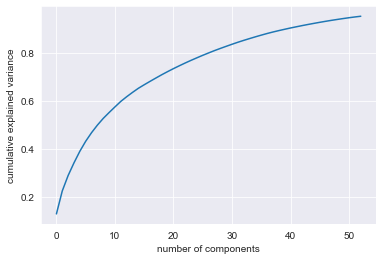

In [89]:
pca = PCA(n_components=0.95).fit(X_train_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [90]:
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [91]:
X_train_pca

array([[-2.42223721,  2.30478514, -1.04889451, ...,  0.25743554,
        -0.46054221, -0.19098709],
       [-2.13723788, -0.07548711, -0.27843471, ...,  0.38970771,
         0.60134538, -0.30552403],
       [ 2.42158739, -1.97310322,  0.3016807 , ..., -0.17876492,
         1.04512376, -0.21039031],
       ...,
       [10.53196624,  9.59159485, -3.26992956, ..., -0.22393858,
         0.26305541,  0.50785481],
       [ 1.98375383, -0.44396864, -3.23035409, ...,  0.76613807,
         0.18354393,  0.07595437],
       [-3.19307601,  0.92963982,  0.38963456, ..., -0.05378264,
        -0.21684139, -0.45309725]])

LDA

In [92]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

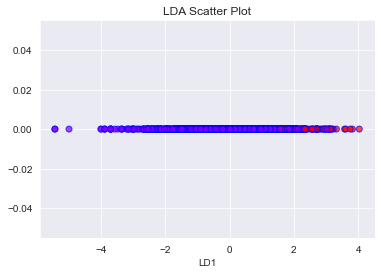

In [93]:
# Create a scatter plot of the transformed data
plt.scatter(X_train_lda, np.zeros(len(X_train_lda)), c=y_train, cmap='rainbow', alpha=0.7, edgecolors='b')
plt.xlabel('LD1')
plt.title('LDA Scatter Plot')
plt.show()

In [94]:
X_train_preprocessed = X_train_scaled
X_test_preprocessed = X_test_scaled

Classification models

In [95]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

def evaluate_model(model_name, y_true, y_pred):
    # Evaluate the model using various metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    print(model_name)
    # Print the evaluation metrics
    print("Accuracy:", round(accuracy, 2))
    print("Precision:", round(precision, 2))
    print("Recall:", round(recall, 2))
    print("F1-score:", round(f1, 2))
    print("ROC-AUC score:", round(roc_auc, 2))

    # Compute the confusion matrix
    confusion_mat = confusion_matrix(y_true, y_pred)

    # Create a heatmap visualization of the confusion matrix
    fig, ax = plt.subplots(figsize=(8, 8))
    sns.heatmap(confusion_mat, annot=True, cmap="Blues", fmt="d", ax=ax)

    # Set the axis labels and title
    ax.set_xlabel("Predicted Labels")
    ax.set_ylabel("True Labels")
    ax.set_title("Confusion Matrix")

    # Show the plot
    plt.show()

In [96]:
from sklearn.model_selection import GridSearchCV

Logistic Regression model

In [97]:
from sklearn.linear_model import LogisticRegression

# Define the range of values for each hyperparameter
C = np.linspace(0.01, 1, 15)
PENALTY = ['l1', 'l2']
SOLVER = ['liblinear', 'saga']

PARAM_GRID  = {
    'C': C,
    'penalty': PENALTY,
    'solver': SOLVER
}

# Create the logistic regression estimator
estimator = LogisticRegression(random_state=420)

# Use grid search and cross-validation to tune the hyper parameters
model_searcher = GridSearchCV(estimator, PARAM_GRID, verbose=0)
model_searcher.fit(X_train_preprocessed, y_train)

# The best combination of hyperparameters
model_searcher.best_params_

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

{'C': 0.505, 'penalty': 'l2', 'solver': 'liblinear'}

Logistic Regression (test data)
Accuracy: 0.56
Precision: 0.79
Recall: 0.49
F1-score: 0.6
ROC-AUC score: 0.6


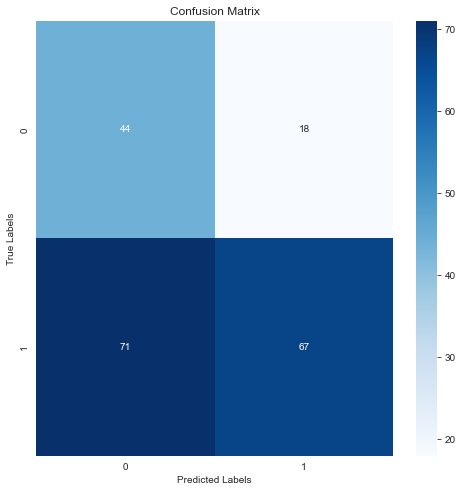

In [98]:
# Get the best estimator
log_reg_best_estimator = model_searcher.best_estimator_
y_test_pred = log_reg_best_estimator.predict(X_test_preprocessed)

evaluate_model("Logistic Regression (test data)", y_test, y_test_pred) 

Gradient Boosting model

In [99]:
from sklearn.ensemble import GradientBoostingClassifier

# Define the range of values for each hyperparameter
LEARNING_RATE = np.linspace(0.01, 0.5, 10)
MAX_DEPTH = range(2, 5)
N_ESTIMATORS = range(100, 180, 15)


PARAM_GRID  = {
    'learning_rate': LEARNING_RATE,
    'max_depth': MAX_DEPTH,
    'n_estimators': N_ESTIMATORS
}

# Create the gradient boosting estimator
estimator = GradientBoostingClassifier(random_state=420)

# Use grid search and cross-validation to tune the hyper parameters
model_searcher = GridSearchCV(estimator, PARAM_GRID, verbose=0)
model_searcher.fit(X_train_preprocessed, y_train)

# The best combination of hyperparameters
model_searcher.best_params_

{'learning_rate': 0.3911111111111111, 'max_depth': 4, 'n_estimators': 160}

Gradient Boosting (test data)
Accuracy: 0.65
Precision: 0.81
Recall: 0.64
F1-score: 0.72
ROC-AUC score: 0.66


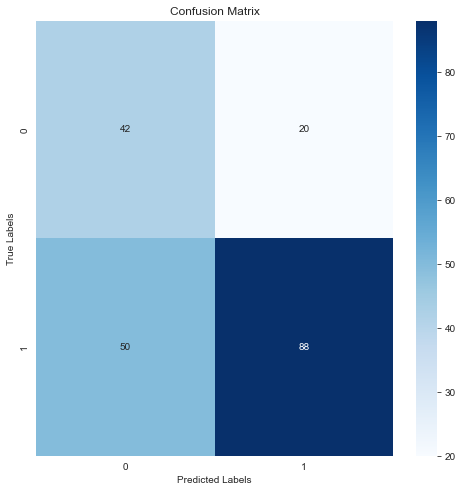

In [100]:
# Get the best estimator
gb_best_estimator = model_searcher.best_estimator_
y_test_pred = gb_best_estimator.predict(X_test_preprocessed)

evaluate_model("Gradient Boosting (test data)", y_test, y_test_pred)

Support Vector Machine model

In [101]:
from sklearn.svm import SVC

# Define the range of values for each hyperparameter
C = np.linspace(0.01, 1, 15)
KERNEL = ['linear', 'poly', 'rbf', 'sigmoid']
GAMMA = ['scale', 'auto']

PARAM_GRID  = {
    'C': C,
    'kernel': KERNEL,
    'gamma': GAMMA
}

# Create the support vector machine estimator
estimator = SVC(random_state=420)

# Use grid search and cross-validation to tune the hyper parameters
model_searcher = GridSearchCV(estimator, PARAM_GRID, verbose=0)
model_searcher.fit(X_train_preprocessed, y_train)

# The best combination of hyperparameters
model_searcher.best_params_

{'C': 1.0, 'gamma': 'auto', 'kernel': 'rbf'}

Evaluate the best model on the test data

Support Vector Machine (test data)
Accuracy: 0.58
Precision: 0.79
Recall: 0.54
F1-score: 0.64
ROC-AUC score: 0.61


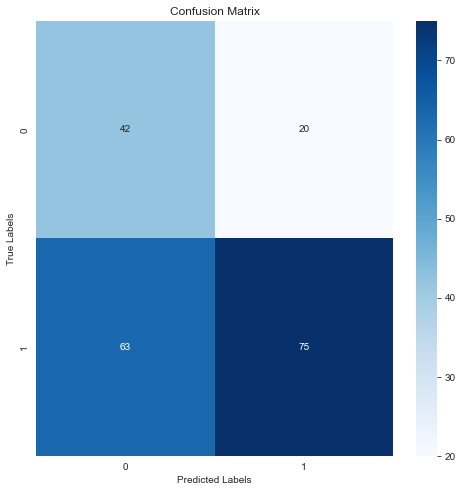

In [102]:
svm_best_estimator = model_searcher.best_estimator_
y_test_pred = svm_best_estimator.predict(X_test_preprocessed)

evaluate_model("Support Vector Machine (test data)", y_test, y_test_pred)

Random Forest model

In [103]:
from sklearn.ensemble import RandomForestClassifier

# Define the range of values for each hyperparameter
N_ESTIMATORS = range(50, 140, 15)
MAX_DEPTH = range(2, 6)
MIN_SAMPLES_SPLIT = range(2, 4)
MIN_SAMPLES_LEAF = range(1, 4)

PARAM_GRID  = {
    'n_estimators': N_ESTIMATORS,
    'max_depth': MAX_DEPTH,
    'min_samples_split': MIN_SAMPLES_SPLIT,
    'min_samples_leaf': MIN_SAMPLES_LEAF
}

# Create the random forest estimator
estimator = RandomForestClassifier(random_state=420)

# Use grid search and cross-validation to tune the hyper parameters
model_searcher = GridSearchCV(estimator, PARAM_GRID, verbose=0)
model_searcher.fit(X_train_preprocessed, y_train)


# The best combination of hyperparameters
model_searcher.best_params_

{'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 125}

Random Forest (test data)
Accuracy: 0.62
Precision: 0.82
Recall: 0.59
F1-score: 0.68
ROC-AUC score: 0.65


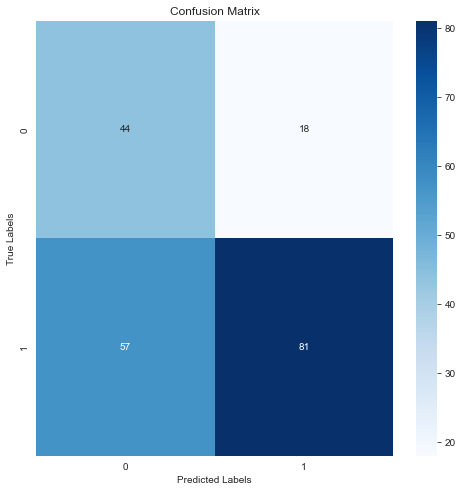

In [104]:
rf_best_estimator = model_searcher.best_estimator_
y_test_pred = rf_best_estimator.predict(X_test_preprocessed)

evaluate_model("Random Forest (test data)", y_test, y_test_pred)

XGBoost model

In [105]:
from xgboost import XGBClassifier

# Define the range of values for each hyperparameter
LEARNING_RATE = np.linspace(0.05, 0.5, 10)
MAX_DEPTH = range(1, 5)
N_ESTIMATORS = range(70, 150, 15)

PARAM_GRID  = {
    'learning_rate': LEARNING_RATE,
    'max_depth': MAX_DEPTH,
    'n_estimators': N_ESTIMATORS
}

# Define the ratio for scale_pos_weight
ratio = float(np.sum(y_train == 0)) / np.sum(y_train == 1)

# Create a XGBoost classifier with specific parameters
estimator = XGBClassifier(objective='binary:logistic', scale_pos_weight=ratio)


# Use grid search and cross-validation to tune the hyper parameters
model_searcher = GridSearchCV(estimator, PARAM_GRID, verbose=0)
model_searcher.fit(X_train_preprocessed, y_train)

# The best combination of hyperparameters
model_searcher.best_params_

{'learning_rate': 0.35000000000000003, 'max_depth': 4, 'n_estimators': 115}

Evaluate the best model on the test data

XGBoost (test data)
Accuracy: 0.63
Precision: 0.8
Recall: 0.62
F1-score: 0.7
ROC-AUC score: 0.63


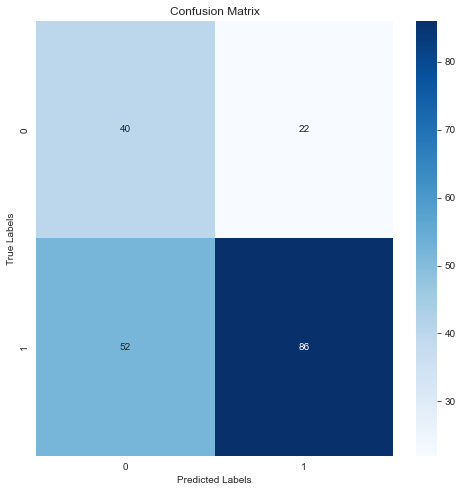

In [106]:
xgb_best_estimator = model_searcher.best_estimator_
y_test_pred = xgb_best_estimator.predict(X_test_preprocessed)

evaluate_model("XGBoost (test data)", y_test, y_test_pred)

TabNetClassifier with automatic hyperparameters tuning

In [107]:
!pip install pytorch-tabnet
!pip install optuna

In [108]:
# Convert Pandas DataFrame to NumPy array
X_train_np = X_train_preprocessed.values
X_test_np = X_test_preprocessed.values

In [109]:
import torch
from pytorch_tabnet.tab_model import TabNetClassifier
import optuna
from sklearn.metrics import mean_squared_error

# Define objective function for optuna
def objective(trial):
    # Generate hyperparameter search space
    params = {
        'n_d': trial.suggest_int('n_d', 8, 64),
        'n_a': trial.suggest_int('n_a', 8, 64),
        'n_steps': trial.suggest_int('n_steps', 1, 19),
        'gamma': trial.suggest_float('gamma', 0.1, 2.0),
        'n_independent': trial.suggest_int('n_independent', 1, 10),
        'n_shared': trial.suggest_int('n_shared', 1, 10),
        'lambda_sparse': trial.suggest_float('lambda_sparse', 0.0001, 0.1),
        # 'optimizer_fn': torch.optim.Adam,
        # 'optimizer_params': dict(lr=2e-2, weight_decay=1e-5),
        # 'mask_type': 'entmax',
        # 'scheduler_params': dict(mode="min", patience=5, min_lr=1e-5, factor=0.9,),
        # 'scheduler_fn': torch.optim.lr_scheduler.ReduceLROnPlateau,
        'verbose': 0
    }

    # Create TabNetClassifier object with hyperparameters from optuna
    classifier = TabNetClassifier(**params)

    # Train and evaluate the model
    classifier.fit(X_train_np, y_train, eval_set=[(X_test_np, y_test)])
    val_preds = classifier.predict_proba(X_test_np)[:, 1]
    val_auc = roc_auc_score(y_test, val_preds)

    return val_auc

# Create optuna study
study = optuna.create_study(direction='maximize')

# Optimize hyperparameters using optuna
study.optimize(objective, n_trials=42, timeout=600)

# Get best hyperparameters from optuna
best_params = study.best_trial.params

# Train final model with best hyperparameters
tabnet = TabNetClassifier(**best_params)
tabnet.fit(X_train_np, y_train)
best_params

[I 2023-10-12 11:49:41,993] A new study created in memory with name: no-name-f134f433-f32d-44e8-b81c-639dc954022e



Early stopping occurred at epoch 22 with best_epoch = 12 and best_val_0_auc = 0.63043


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-10-12 11:50:06,847] Trial 0 finished with value: 0.6304347826086957 and parameters: {'n_d': 44, 'n_a': 44, 'n_steps': 11, 'gamma': 1.603442471172293, 'n_independent': 8, 'n_shared': 4, 'lambda_sparse': 0.0008095800718938824}. Best is trial 0 with value: 0.6304347826086957.



Early stopping occurred at epoch 17 with best_epoch = 7 and best_val_0_auc = 0.56159


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-10-12 11:50:27,622] Trial 1 finished with value: 0.5615942028985508 and parameters: {'n_d': 27, 'n_a': 59, 'n_steps': 11, 'gamma': 1.966645296931019, 'n_independent': 5, 'n_shared': 8, 'lambda_sparse': 0.001598978759499235}. Best is trial 0 with value: 0.6304347826086957.



Early stopping occurred at epoch 27 with best_epoch = 17 and best_val_0_auc = 0.66924


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-10-12 11:50:35,660] Trial 2 finished with value: 0.6692379616643291 and parameters: {'n_d': 38, 'n_a': 18, 'n_steps': 5, 'gamma': 1.8871766569105566, 'n_independent': 3, 'n_shared': 5, 'lambda_sparse': 0.02007328679803657}. Best is trial 2 with value: 0.6692379616643291.



Early stopping occurred at epoch 11 with best_epoch = 1 and best_val_0_auc = 0.52945


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-10-12 11:50:47,875] Trial 3 finished with value: 0.52945301542777 and parameters: {'n_d': 34, 'n_a': 26, 'n_steps': 18, 'gamma': 0.8930675159118291, 'n_independent': 5, 'n_shared': 2, 'lambda_sparse': 0.019264957861614713}. Best is trial 2 with value: 0.6692379616643291.



Early stopping occurred at epoch 22 with best_epoch = 12 and best_val_0_auc = 0.65299


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-10-12 11:50:55,604] Trial 4 finished with value: 0.6529920523609164 and parameters: {'n_d': 26, 'n_a': 32, 'n_steps': 5, 'gamma': 1.9998127177200098, 'n_independent': 2, 'n_shared': 7, 'lambda_sparse': 0.0680241495676524}. Best is trial 2 with value: 0.6692379616643291.



Early stopping occurred at epoch 26 with best_epoch = 16 and best_val_0_auc = 0.73527


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-10-12 11:51:07,854] Trial 5 finished with value: 0.735273492286115 and parameters: {'n_d': 49, 'n_a': 13, 'n_steps': 6, 'gamma': 0.22014945526562743, 'n_independent': 8, 'n_shared': 2, 'lambda_sparse': 0.06462641921510218}. Best is trial 5 with value: 0.735273492286115.



Early stopping occurred at epoch 12 with best_epoch = 2 and best_val_0_auc = 0.63371


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-10-12 11:51:23,431] Trial 6 finished with value: 0.633707339878448 and parameters: {'n_d': 53, 'n_a': 15, 'n_steps': 13, 'gamma': 0.7292041376761663, 'n_independent': 2, 'n_shared': 10, 'lambda_sparse': 0.030218741447839446}. Best is trial 5 with value: 0.735273492286115.



Early stopping occurred at epoch 28 with best_epoch = 18 and best_val_0_auc = 0.68946


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-10-12 11:51:50,611] Trial 7 finished with value: 0.6894576905095839 and parameters: {'n_d': 29, 'n_a': 28, 'n_steps': 16, 'gamma': 0.5379520680396532, 'n_independent': 2, 'n_shared': 6, 'lambda_sparse': 0.05878647854069965}. Best is trial 5 with value: 0.735273492286115.



Early stopping occurred at epoch 14 with best_epoch = 4 and best_val_0_auc = 0.58053


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-10-12 11:52:22,538] Trial 8 finished with value: 0.5805282842449744 and parameters: {'n_d': 31, 'n_a': 55, 'n_steps': 13, 'gamma': 0.7794956419011088, 'n_independent': 10, 'n_shared': 9, 'lambda_sparse': 0.02670477663750621}. Best is trial 5 with value: 0.735273492286115.



Early stopping occurred at epoch 35 with best_epoch = 25 and best_val_0_auc = 0.72639


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-10-12 11:52:53,490] Trial 9 finished with value: 0.7263908368396448 and parameters: {'n_d': 43, 'n_a': 56, 'n_steps': 9, 'gamma': 0.8384869182628654, 'n_independent': 7, 'n_shared': 3, 'lambda_sparse': 0.015129168296774744}. Best is trial 5 with value: 0.735273492286115.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-10-12 11:52:56,588] Trial 10 finished with value: 0.6197989714820009 and parameters: {'n_d': 12, 'n_a': 43, 'n_steps': 1, 'gamma': 0.11140590452215896, 'n_independent': 10, 'n_shared': 1, 'lambda_sparse': 0.09076403940264949}. Best is trial 5 with value: 0.735273492286115.



Early stopping occurred at epoch 23 with best_epoch = 13 and best_val_0_auc = 0.6198

Early stopping occurred at epoch 35 with best_epoch = 25 and best_val_0_auc = 0.71716


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-10-12 11:53:14,958] Trial 11 finished with value: 0.7171575502571295 and parameters: {'n_d': 55, 'n_a': 8, 'n_steps': 7, 'gamma': 0.27010446815170275, 'n_independent': 7, 'n_shared': 3, 'lambda_sparse': 0.04263253212351083}. Best is trial 5 with value: 0.735273492286115.



Early stopping occurred at epoch 16 with best_epoch = 6 and best_val_0_auc = 0.57948


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-10-12 11:53:26,971] Trial 12 finished with value: 0.5794763908368397 and parameters: {'n_d': 61, 'n_a': 49, 'n_steps': 8, 'gamma': 1.2661545260437361, 'n_independent': 7, 'n_shared': 1, 'lambda_sparse': 0.07060487681425101}. Best is trial 5 with value: 0.735273492286115.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-10-12 11:53:29,461] Trial 13 finished with value: 0.6179289387564283 and parameters: {'n_d': 44, 'n_a': 37, 'n_steps': 1, 'gamma': 0.339783801335801, 'n_independent': 8, 'n_shared': 3, 'lambda_sparse': 0.046532648780630854}. Best is trial 5 with value: 0.735273492286115.



Early stopping occurred at epoch 15 with best_epoch = 5 and best_val_0_auc = 0.61793

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.5959


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-10-12 11:53:34,123] Trial 14 finished with value: 0.5958976157082749 and parameters: {'n_d': 45, 'n_a': 61, 'n_steps': 4, 'gamma': 1.1218947049013797, 'n_independent': 6, 'n_shared': 4, 'lambda_sparse': 0.08624764265994406}. Best is trial 5 with value: 0.735273492286115.



Early stopping occurred at epoch 11 with best_epoch = 1 and best_val_0_auc = 0.59163


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-10-12 11:53:43,298] Trial 15 finished with value: 0.5916316035530622 and parameters: {'n_d': 64, 'n_a': 21, 'n_steps': 8, 'gamma': 0.5895031689204134, 'n_independent': 9, 'n_shared': 2, 'lambda_sparse': 0.05730974600503423}. Best is trial 5 with value: 0.735273492286115.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-10-12 11:53:48,978] Trial 16 finished with value: 0.7203132304815334 and parameters: {'n_d': 52, 'n_a': 8, 'n_steps': 3, 'gamma': 0.4541933610705309, 'n_independent': 4, 'n_shared': 5, 'lambda_sparse': 0.09820388653005357}. Best is trial 5 with value: 0.735273492286115.



Early stopping occurred at epoch 24 with best_epoch = 14 and best_val_0_auc = 0.72031

Early stopping occurred at epoch 19 with best_epoch = 9 and best_val_0_auc = 0.57223


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-10-12 11:54:03,060] Trial 17 finished with value: 0.5722300140252455 and parameters: {'n_d': 17, 'n_a': 52, 'n_steps': 9, 'gamma': 0.9746535399870297, 'n_independent': 7, 'n_shared': 3, 'lambda_sparse': 0.042620332411214164}. Best is trial 5 with value: 0.735273492286115.



Early stopping occurred at epoch 27 with best_epoch = 17 and best_val_0_auc = 0.66258


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-10-12 11:54:20,938] Trial 18 finished with value: 0.6625759700794764 and parameters: {'n_d': 38, 'n_a': 64, 'n_steps': 6, 'gamma': 0.2568592372184896, 'n_independent': 9, 'n_shared': 2, 'lambda_sparse': 0.07267580245732266}. Best is trial 5 with value: 0.735273492286115.



Early stopping occurred at epoch 11 with best_epoch = 1 and best_val_0_auc = 0.38984


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-10-12 11:54:35,056] Trial 19 finished with value: 0.3898433847592333 and parameters: {'n_d': 47, 'n_a': 40, 'n_steps': 13, 'gamma': 0.6850729576789645, 'n_independent': 6, 'n_shared': 4, 'lambda_sparse': 0.03708799179924765}. Best is trial 5 with value: 0.735273492286115.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.61694


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-10-12 11:54:47,156] Trial 20 finished with value: 0.6169354838709677 and parameters: {'n_d': 21, 'n_a': 48, 'n_steps': 10, 'gamma': 0.11559912211255918, 'n_independent': 8, 'n_shared': 6, 'lambda_sparse': 0.0579727433624151}. Best is trial 5 with value: 0.735273492286115.



Early stopping occurred at epoch 32 with best_epoch = 22 and best_val_0_auc = 0.72873


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-10-12 11:54:56,718] Trial 21 finished with value: 0.7287283777466107 and parameters: {'n_d': 52, 'n_a': 8, 'n_steps': 4, 'gamma': 0.46578642970177253, 'n_independent': 4, 'n_shared': 5, 'lambda_sparse': 0.09804084918163193}. Best is trial 5 with value: 0.735273492286115.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-10-12 11:54:59,455] Trial 22 finished with value: 0.6097475455820477 and parameters: {'n_d': 58, 'n_a': 12, 'n_steps': 3, 'gamma': 0.4630044750935926, 'n_independent': 4, 'n_shared': 4, 'lambda_sparse': 0.08086697544194138}. Best is trial 5 with value: 0.735273492286115.



Early stopping occurred at epoch 11 with best_epoch = 1 and best_val_0_auc = 0.60975

Early stopping occurred at epoch 19 with best_epoch = 9 and best_val_0_auc = 0.68794


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-10-12 11:55:05,838] Trial 23 finished with value: 0.687938288920056 and parameters: {'n_d': 49, 'n_a': 23, 'n_steps': 7, 'gamma': 0.5732808064840642, 'n_independent': 4, 'n_shared': 1, 'lambda_sparse': 0.09633433521517751}. Best is trial 5 with value: 0.735273492286115.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-10-12 11:55:10,269] Trial 24 finished with value: 0.7147031323048153 and parameters: {'n_d': 41, 'n_a': 14, 'n_steps': 4, 'gamma': 0.39735640152212826, 'n_independent': 1, 'n_shared': 3, 'lambda_sparse': 0.07933531589881353}. Best is trial 5 with value: 0.735273492286115.



Early stopping occurred at epoch 27 with best_epoch = 17 and best_val_0_auc = 0.7147

Early stopping occurred at epoch 21 with best_epoch = 11 and best_val_0_auc = 0.71821


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-10-12 11:55:22,636] Trial 25 finished with value: 0.7182094436652642 and parameters: {'n_d': 51, 'n_a': 29, 'n_steps': 6, 'gamma': 0.8031439231660317, 'n_independent': 6, 'n_shared': 5, 'lambda_sparse': 0.09937329744147697}. Best is trial 5 with value: 0.735273492286115.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-10-12 11:55:26,209] Trial 26 finished with value: 0.6164679756895746 and parameters: {'n_d': 42, 'n_a': 19, 'n_steps': 2, 'gamma': 0.5579454449614288, 'n_independent': 9, 'n_shared': 7, 'lambda_sparse': 0.08591924463385862}. Best is trial 5 with value: 0.735273492286115.



Early stopping occurred at epoch 11 with best_epoch = 1 and best_val_0_auc = 0.61647

Early stopping occurred at epoch 13 with best_epoch = 3 and best_val_0_auc = 0.67356


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-10-12 11:55:34,584] Trial 27 finished with value: 0.673562412342216 and parameters: {'n_d': 60, 'n_a': 33, 'n_steps': 9, 'gamma': 0.28489585967710035, 'n_independent': 5, 'n_shared': 2, 'lambda_sparse': 0.06371651801344465}. Best is trial 5 with value: 0.735273492286115.



Early stopping occurred at epoch 14 with best_epoch = 4 and best_val_0_auc = 0.68058


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-10-12 11:55:43,368] Trial 28 finished with value: 0.6805750350631136 and parameters: {'n_d': 56, 'n_a': 11, 'n_steps': 6, 'gamma': 0.6703024410635623, 'n_independent': 7, 'n_shared': 6, 'lambda_sparse': 0.04966116369409955}. Best is trial 5 with value: 0.735273492286115.



Early stopping occurred at epoch 22 with best_epoch = 12 and best_val_0_auc = 0.62634


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-10-12 11:56:05,593] Trial 29 finished with value: 0.6263440860215054 and parameters: {'n_d': 49, 'n_a': 16, 'n_steps': 11, 'gamma': 1.1248291463916862, 'n_independent': 8, 'n_shared': 4, 'lambda_sparse': 0.07568923840473586}. Best is trial 5 with value: 0.735273492286115.



Early stopping occurred at epoch 18 with best_epoch = 8 and best_val_0_auc = 0.67987


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-10-12 11:56:14,990] Trial 30 finished with value: 0.6798737727910239 and parameters: {'n_d': 35, 'n_a': 44, 'n_steps': 9, 'gamma': 0.4013805539245338, 'n_independent': 3, 'n_shared': 3, 'lambda_sparse': 0.06584958236999557}. Best is trial 5 with value: 0.735273492286115.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-10-12 11:56:21,335] Trial 31 finished with value: 0.741234221598878 and parameters: {'n_d': 51, 'n_a': 8, 'n_steps': 3, 'gamma': 0.49043879044704963, 'n_independent': 4, 'n_shared': 5, 'lambda_sparse': 0.09302245943126658}. Best is trial 31 with value: 0.741234221598878.



Early stopping occurred at epoch 26 with best_epoch = 16 and best_val_0_auc = 0.74123


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-10-12 11:56:29,385] Trial 32 finished with value: 0.7621552127162226 and parameters: {'n_d': 47, 'n_a': 10, 'n_steps': 3, 'gamma': 0.2016136958974633, 'n_independent': 3, 'n_shared': 7, 'lambda_sparse': 0.09257935444082878}. Best is trial 32 with value: 0.7621552127162226.



Early stopping occurred at epoch 31 with best_epoch = 21 and best_val_0_auc = 0.76216


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-10-12 11:56:35,501] Trial 33 finished with value: 0.7424029920523609 and parameters: {'n_d': 49, 'n_a': 11, 'n_steps': 3, 'gamma': 0.18250113824172576, 'n_independent': 3, 'n_shared': 8, 'lambda_sparse': 0.0923097064172791}. Best is trial 32 with value: 0.7621552127162226.



Early stopping occurred at epoch 21 with best_epoch = 11 and best_val_0_auc = 0.7424


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-10-12 11:56:39,586] Trial 34 finished with value: 0.7033660589060309 and parameters: {'n_d': 46, 'n_a': 12, 'n_steps': 2, 'gamma': 0.23481405503217473, 'n_independent': 3, 'n_shared': 8, 'lambda_sparse': 0.09073554289168306}. Best is trial 32 with value: 0.7621552127162226.



Early stopping occurred at epoch 19 with best_epoch = 9 and best_val_0_auc = 0.70337


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-10-12 11:56:47,170] Trial 35 finished with value: 0.7217157550257131 and parameters: {'n_d': 39, 'n_a': 23, 'n_steps': 3, 'gamma': 0.14368250280970335, 'n_independent': 1, 'n_shared': 8, 'lambda_sparse': 0.07884271494849837}. Best is trial 32 with value: 0.7621552127162226.



Early stopping occurred at epoch 31 with best_epoch = 21 and best_val_0_auc = 0.72172

Early stopping occurred at epoch 35 with best_epoch = 25 and best_val_0_auc = 0.68186


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-10-12 11:57:01,355] Trial 36 finished with value: 0.6818606825619449 and parameters: {'n_d': 48, 'n_a': 18, 'n_steps': 5, 'gamma': 0.18633341850467325, 'n_independent': 3, 'n_shared': 7, 'lambda_sparse': 0.08509882884563538}. Best is trial 32 with value: 0.7621552127162226.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-10-12 11:57:04,826] Trial 37 finished with value: 0.6600046750818139 and parameters: {'n_d': 56, 'n_a': 11, 'n_steps': 2, 'gamma': 0.3308537223516334, 'n_independent': 2, 'n_shared': 10, 'lambda_sparse': 0.09066298965016477}. Best is trial 32 with value: 0.7621552127162226.



Early stopping occurred at epoch 14 with best_epoch = 4 and best_val_0_auc = 0.66

Early stopping occurred at epoch 23 with best_epoch = 13 and best_val_0_auc = 0.64341


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-10-12 11:57:16,900] Trial 38 finished with value: 0.6434081346423562 and parameters: {'n_d': 40, 'n_a': 17, 'n_steps': 5, 'gamma': 0.2140560345825163, 'n_independent': 5, 'n_shared': 9, 'lambda_sparse': 0.07675993906434536}. Best is trial 32 with value: 0.7621552127162226.



Early stopping occurred at epoch 24 with best_epoch = 14 and best_val_0_auc = 0.6849


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-10-12 11:57:25,815] Trial 39 finished with value: 0.6848994857410005 and parameters: {'n_d': 54, 'n_a': 14, 'n_steps': 4, 'gamma': 0.10857063234881974, 'n_independent': 2, 'n_shared': 9, 'lambda_sparse': 0.09320369269904029}. Best is trial 32 with value: 0.7621552127162226.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-10-12 11:57:30,801] Trial 40 finished with value: 0.6504791958859282 and parameters: {'n_d': 50, 'n_a': 25, 'n_steps': 1, 'gamma': 0.39233666273694406, 'n_independent': 5, 'n_shared': 7, 'lambda_sparse': 0.0839620206636799}. Best is trial 32 with value: 0.7621552127162226.



Early stopping occurred at epoch 30 with best_epoch = 20 and best_val_0_auc = 0.65048

Early stopping occurred at epoch 26 with best_epoch = 16 and best_val_0_auc = 0.71576


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-10-12 11:57:39,541] Trial 41 finished with value: 0.7157550257129499 and parameters: {'n_d': 53, 'n_a': 9, 'n_steps': 4, 'gamma': 0.311637989696365, 'n_independent': 4, 'n_shared': 6, 'lambda_sparse': 0.09454086667750214}. Best is trial 32 with value: 0.7621552127162226.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:651: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 1.16385 |  0:00:00s
epoch 1  | loss: 1.11826 |  0:00:00s
epoch 2  | loss: 1.10605 |  0:00:00s
epoch 3  | loss: 1.05287 |  0:00:00s
epoch 4  | loss: 1.05014 |  0:00:01s
epoch 5  | loss: 1.02179 |  0:00:01s
epoch 6  | loss: 1.01286 |  0:00:01s
epoch 7  | loss: 0.98325 |  0:00:01s
epoch 8  | loss: 0.96202 |  0:00:01s
epoch 9  | loss: 0.96943 |  0:00:02s
epoch 10 | loss: 0.95414 |  0:00:02s
epoch 11 | loss: 0.95266 |  0:00:02s
epoch 12 | loss: 0.95162 |  0:00:02s
epoch 13 | loss: 0.92959 |  0:00:03s
epoch 14 | loss: 1.0114  |  0:00:03s
epoch 15 | loss: 0.95447 |  0:00:03s
epoch 16 | loss: 0.92163 |  0:00:03s
epoch 17 | loss: 0.89481 |  0:00:03s
epoch 18 | loss: 0.91257 |  0:00:04s
epoch 19 | loss: 0.90078 |  0:00:04s
epoch 20 | loss: 0.90453 |  0:00:04s
epoch 21 | loss: 0.88123 |  0:00:04s
epoch 22 | loss: 0.90553 |  0:00:05s
epoch 23 | loss: 0.88513 |  0:00:05s
epoch 24 | loss: 0.88988 |  0:00:05s
epoch 25 | loss: 0.87562 |  0:00:05s
epoch 26 | loss: 0.88366 |  0:00:05s
e

{'n_d': 47,
 'n_a': 10,
 'n_steps': 3,
 'gamma': 0.2016136958974633,
 'n_independent': 3,
 'n_shared': 7,
 'lambda_sparse': 0.09257935444082878}

Evaluate the best model on the test data

Tabnet (test data)
Accuracy: 0.5
Precision: 0.74
Recall: 0.43
F1-score: 0.54
ROC-AUC score: 0.54


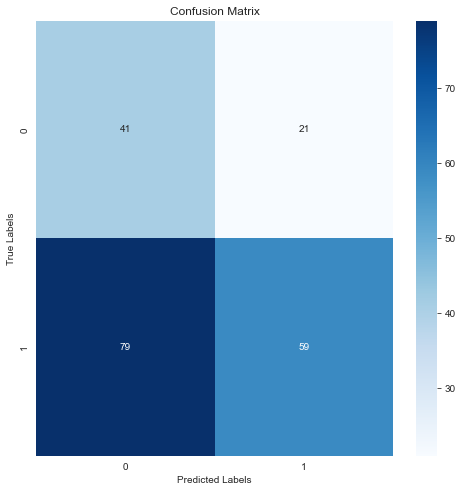

In [110]:
# Evaluate final model on test set
y_test_pred = tabnet.predict(X_test_np)
evaluate_model("Tabnet (test data)", y_test, y_test_pred)

The best model is Gradient Boosting

In [125]:
the_best_model_ever = gb_best_estimator

Feature importance

In [126]:
feature_importances = pd.DataFrame(the_best_model_ever.feature_importances_,
                                   index = X_train_preprocessed.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
Fixation_Mean_Pupil_Mean,0.116230
Saccades_Peak_Velocitiy_StDev,0.040215
Fixations_Rate,0.033742
Fixations_Duration_Mean,0.033687
Saccades_Duration_StDev,0.031109
...,...
Duration_Saccades_End_First_In_RoI_Pre,0.001345
peak_velocity_Mean_Saccades_Start_In_RoI_Pre,0.001268
peak_velocity_Max_Saccades_End_In_RoI_Pre,0.001213
last_onset_Mean_Saccades_End_In_RoI_Pre,0.000738


Save the best model

In [113]:
import pickle

# Save the best model
with open(os.path.join(config.classification_resource_dir, 'the_best_model_ever.pkl'), 'wb') as f:
    pickle.dump(the_best_model_ever, f)

In [114]:
# Load the best model
with open(os.path.join(config.classification_resource_dir, 'the_best_model_ever.pkl'), 'rb') as f:
    the_saved_model = pickle.load(f)

Desicion Tree model

In [115]:
from sklearn.tree import DecisionTreeClassifier

# Define the range of values for each hyperparameter
MAX_DEPTH = range(1, 5)
MIN_SAMPLES_SPLIT = range(2, 4)
MIN_SAMPLES_LEAF = range(1, 4)

PARAM_GRID  = {
    'max_depth': MAX_DEPTH,
    'min_samples_split': MIN_SAMPLES_SPLIT,
    'min_samples_leaf': MIN_SAMPLES_LEAF
}

# Create the decision tree estimator
estimator = DecisionTreeClassifier(random_state=420)

# Use grid search and cross-validation to tune the hyper parameters
model_searcher = GridSearchCV(estimator, PARAM_GRID, verbose=0)
model_searcher.fit(X_train_preprocessed, y_train)

# The best combination of hyperparameters
model_searcher.best_params_

{'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}

Decision Tree (test data)
Accuracy: 0.6
Precision: 0.72
Recall: 0.68
F1-score: 0.7
ROC-AUC score: 0.55


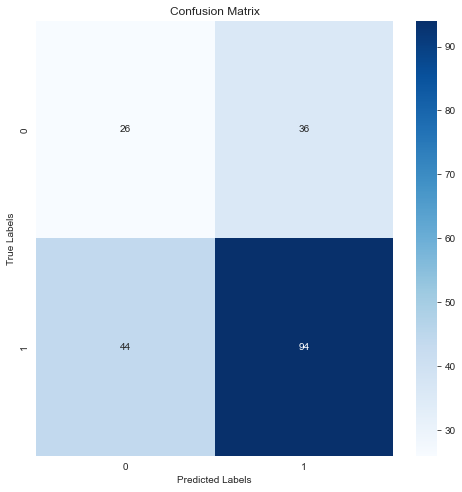

In [116]:
dt_best_estimator = model_searcher.best_estimator_
y_test_pred = dt_best_estimator.predict(X_test_preprocessed)

evaluate_model("Decision Tree (test data)", y_test, y_test_pred)

Visualize the DecisionTreeClassifier

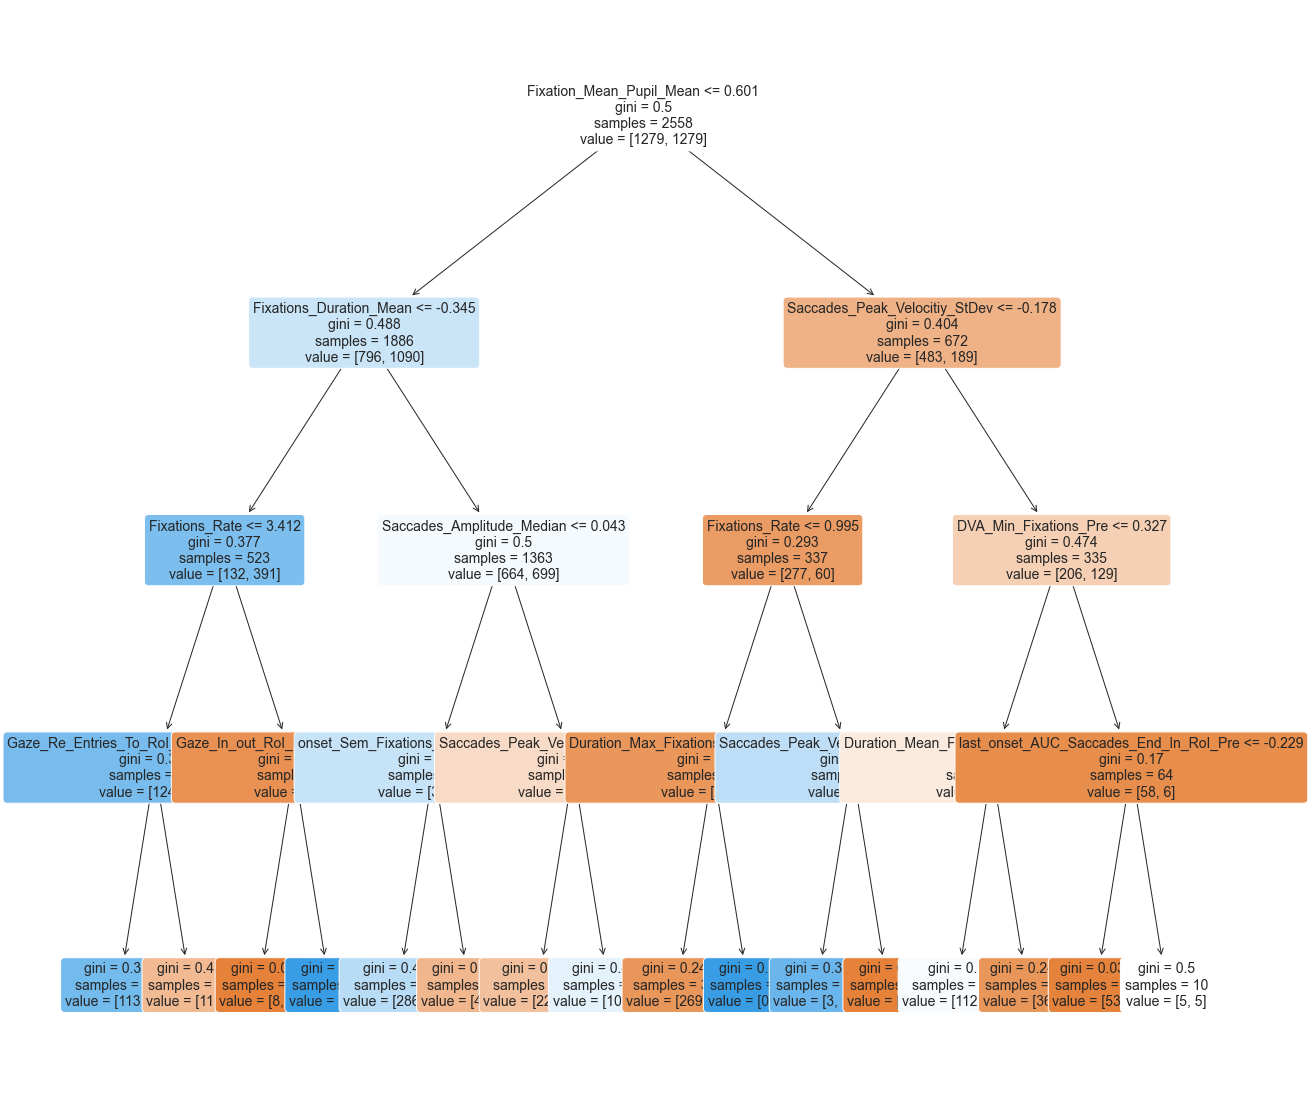

In [117]:
from sklearn.tree import plot_tree

# Plot the first tree
plt.figure(figsize=(20, 20))
plot_tree(dt_best_estimator, feature_names=X_train_preprocessed.columns, filled=True, rounded=True, fontsize=14)

# Save the tree as png file
plt.savefig('plot_tree.png')

# Show the plot
plt.show()

Plot Decision Tree with Graphviz

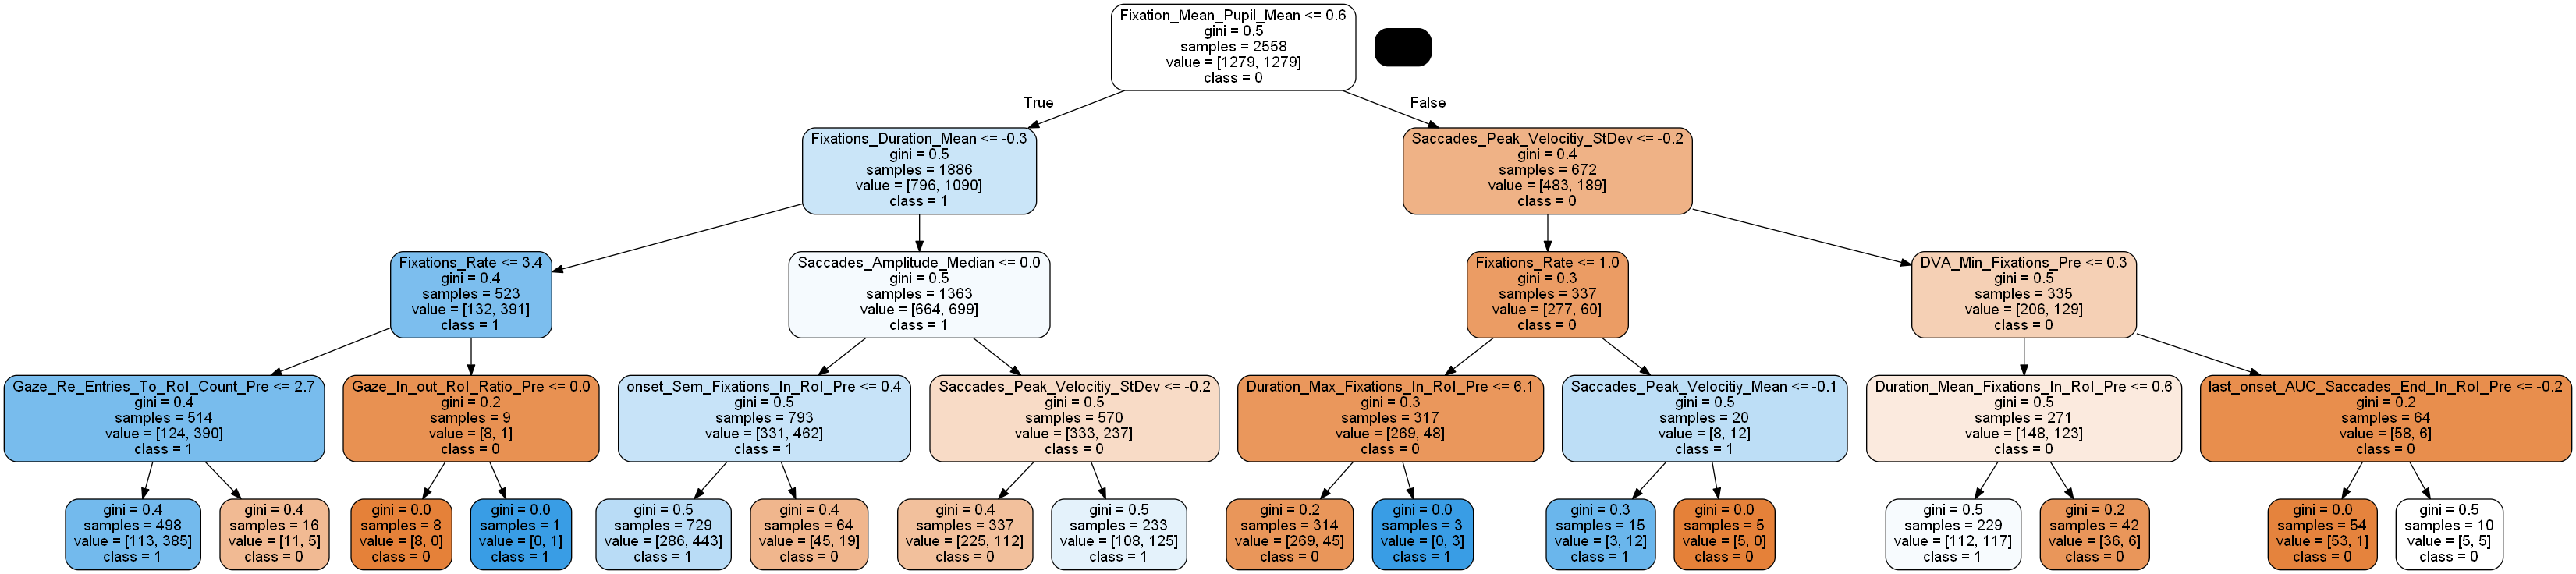

In [118]:
from sklearn.tree import export_graphviz
import pydot

# Export the decision tree as a dot file
export_graphviz(dt_best_estimator, out_file='decision_tree.dot', feature_names=X_train_preprocessed.columns, rounded=True, precision=1, filled=True, class_names=['0', '1'])

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('decision_tree.dot')

# Write graph to a png file
graph.write_png('decision_tree.png')

# Display the tree
from IPython.display import Image
Image(filename='decision_tree.png')

Print Text Representation

In [119]:
from sklearn.tree import export_text

# Print the text representation of the decision tree
print(export_text(dt_best_estimator, feature_names=list(X_train_preprocessed.columns)))

|--- Fixation_Mean_Pupil_Mean <= 0.60
|   |--- Fixations_Duration_Mean <= -0.35
|   |   |--- Fixations_Rate <= 3.41
|   |   |   |--- Gaze_Re_Entries_To_RoI_Count_Pre <= 2.65
|   |   |   |   |--- class: 1.0
|   |   |   |--- Gaze_Re_Entries_To_RoI_Count_Pre >  2.65
|   |   |   |   |--- class: 0.0
|   |   |--- Fixations_Rate >  3.41
|   |   |   |--- Gaze_In_out_RoI_Ratio_Pre <= 0.05
|   |   |   |   |--- class: 0.0
|   |   |   |--- Gaze_In_out_RoI_Ratio_Pre >  0.05
|   |   |   |   |--- class: 1.0
|   |--- Fixations_Duration_Mean >  -0.35
|   |   |--- Saccades_Amplitude_Median <= 0.04
|   |   |   |--- onset_Sem_Fixations_In_RoI_Pre <= 0.35
|   |   |   |   |--- class: 1.0
|   |   |   |--- onset_Sem_Fixations_In_RoI_Pre >  0.35
|   |   |   |   |--- class: 0.0
|   |   |--- Saccades_Amplitude_Median >  0.04
|   |   |   |--- Saccades_Peak_Velocitiy_StDev <= -0.18
|   |   |   |   |--- class: 0.0
|   |   |   |--- Saccades_Peak_Velocitiy_StDev >  -0.18
|   |   |   |   |--- class: 1.0
|--- Fixation_

In [120]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y_train)

Explore the best features

Index(['Fixation_Mean_Pupil_Mean', 'Fixations_Duration_Mean',
       'Fixations_Count', 'Fixations_Rate', 'Saccades_Peak_Velocitiy_StDev'],
      dtype='object')
Gradient Boosting (test data, top 10 features)
Accuracy: 0.57
Precision: 0.81
Recall: 0.49
F1-score: 0.61
ROC-AUC score: 0.62


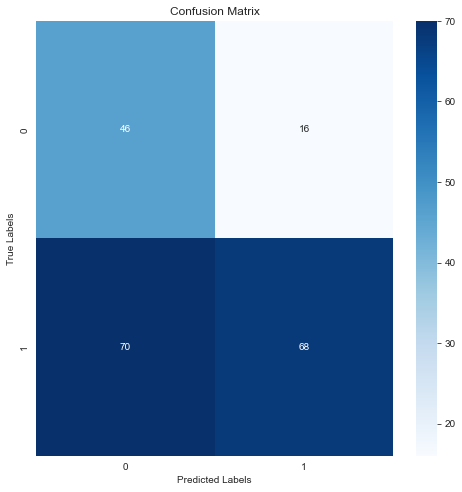

In [121]:
# Get the indices of the top 10 features
top10_idx = feature_importances.head(5).index
print(top10_idx)

# Subset the data based on the top 10 features
X_train_top10 = X_train_preprocessed[top10_idx]
X_test_top10 = X_test_preprocessed[top10_idx]

# Train the model on the top 10 features
the_saved_model.fit(X_train_top10, y_train)

# Evaluate the model on the test data
y_test_pred = the_saved_model.predict(X_test_top10)
evaluate_model("Gradient Boosting (test data, top 10 features)", y_test, y_test_pred)

In [122]:
# plot the top 1 feature based on features_df and labels_df (pop) - to see the difference between the groups

Fixation_Mean_Pupil_Mean
   Fixation_Mean_Pupil_Mean  pop
0                -15.553531  1.0
1                 -4.251380  1.0
3                 24.801687  1.0
4                  1.000923  0.0
6                 11.678077  0.0


C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


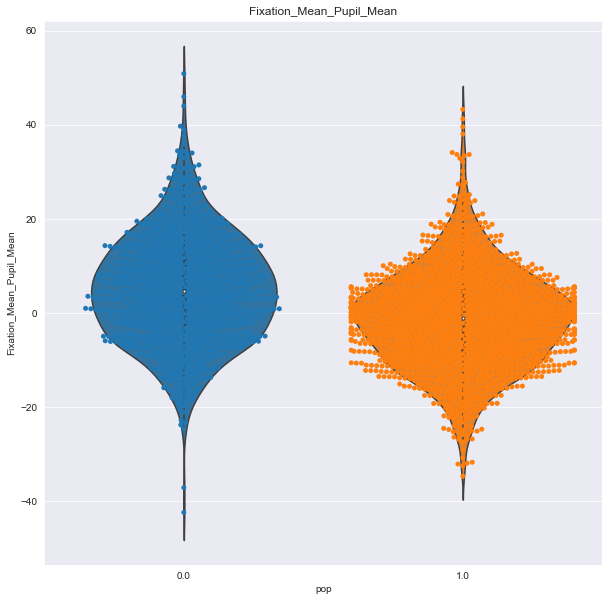

In [123]:
import seaborn as sns

# Get the index of the top 1 feature as string
top1_idx = str(feature_importances.head(1).index[0]) # 'Duration_Saccades_End_First_In_RoI_Pre' 
print(top1_idx)

# Subset the data based on the top 1 feature
data_df_top1 = features_df.merge(labels_df, left_index=True, right_index=True)[[top1_idx, 'pop']]
print(data_df_top1.head())

# Plot the top 1 feature in a swarmplot
plt.figure(figsize=(10, 10))
sns.swarmplot(x='pop', y=top1_idx, data=data_df_top1)
sns.violinplot(x='pop', y=top1_idx, data=data_df_top1)
plt.title(top1_idx)
plt.show()

Plot both distributions side by side of the top 1 feature for the two groups

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


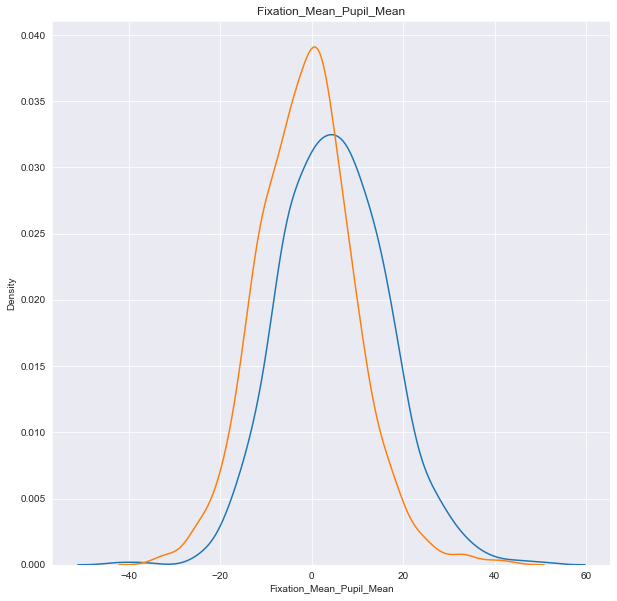

In [124]:
plt.figure(figsize=(10, 10))
sns.distplot(data_df_top1[data_df_top1['pop'] == 0][top1_idx], hist=False, label='0')
sns.distplot(data_df_top1[data_df_top1['pop'] == 1][top1_idx], hist=False, label='1')
plt.title(top1_idx)
plt.show()